In [19]:
import joblib
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

class DDoSDetection:
    def __init__(self, model, scaler):
        self.model = model
        self.scaler = scaler

    def predict(self, data):
        scaled_data = self.scaler.transform(data)
        predictions = (self.model.predict(scaled_data) > 0.5).astype("int64")
        return predictions

class SQLXSSDetection:
    def __init__(self, model, scaler):
        self.model = model
        self.scaler = scaler

    def predict(self, data):
        scaled_data = self.scaler.transform(data)
        predictions = (self.model.predict(scaled_data) > 0.5).astype("int64")
        return predictions

def main():
    # Load DDoS detection model and scaler
    ddos_detection_model = load_model('I:/WAF with mechine learning/DDos/CNN model for DDOS.h5')
    ss_ddos = joblib.load('I:/WAF with mechine learning/DDos/dods_standard_scaler.pkl')
    
    # Load SQL injection and XSS detection model and scaler
    sql_xss_detection_model = load_model('I:/WAF with mechine learning/SQL and XSS/CNN_model_for_XSS_and_SQL_injection.h5')
    ss_sql_xss = joblib.load('I:/WAF with mechine learning/SQL and XSS/scaler.pkl')

    # Initialize DDoS detection layer
    ddos_detector = DDoSDetection(ddos_detection_model, ss_ddos)

    # Initialize SQL injection and XSS detection layer
    sql_xss_detector = SQLXSSDetection(sql_xss_detection_model, ss_sql_xss)

    # Load your test datasets
    ddos_test_data = np.loadtxt('I:/WAF with mechine learning/Dataset/DDos 2019 cic/01-12/DrDoS_DNStest.csv', delimiter=',', skiprows=1)
    xss_sql_test_data = pd.read_csv('I:/WAF with mechine learning/Dataset/SQL and XSS/testdataset.csv', index_col=0)

    # Preprocess the test dataset for DDoS detection
    ddos_test_data_std = ddos_detector.scaler.transform(ddos_test_data[:, :20])

    # Preprocess the test dataset for SQL injection and XSS detection
    xss_sql_test_data_numeric = xss_sql_test_data.select_dtypes(include=['int64', 'float64'])
    xss_sql_test_data_std = sql_xss_detector.scaler.transform(xss_sql_test_data_numeric)

    # First Layer: DDoS Detection
    ddos_predictions = ddos_detector.predict(ddos_test_data_std)

    # Filter out DDoS predicted data
    ddos_attack_indices = np.where(ddos_predictions == 1)[0]
    ddos_attack_data = ddos_test_data[ddos_attack_indices]

    # Second Layer: SQL injection and XSS Detection
    xss_sql_predictions = sql_xss_detector.predict(xss_sql_test_data_std)

    # Combine predictions
    combined_predictions = {
        'DDoS': ddos_predictions,
        'SQL_XSS': xss_sql_predictions
    }

    print("Combined Predictions:", combined_predictions)

if __name__ == "__main__":
    main()


i:\WAF with mechine learning\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
i:\WAF with mechine learning\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
i:\WAF with mechine learning\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


96755/96755 ━━━━━━━━━━━━━━━━━━━━ 287s 3ms/step
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Combined Predictions: {'DDoS': array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64), 'SQL_XSS': array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)}


i:\WAF with mechine learning\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
DDoS Detection Accuracy: 0.999240015
SQL Injection and XSS Detection Accuracy: 0.9981818181818182


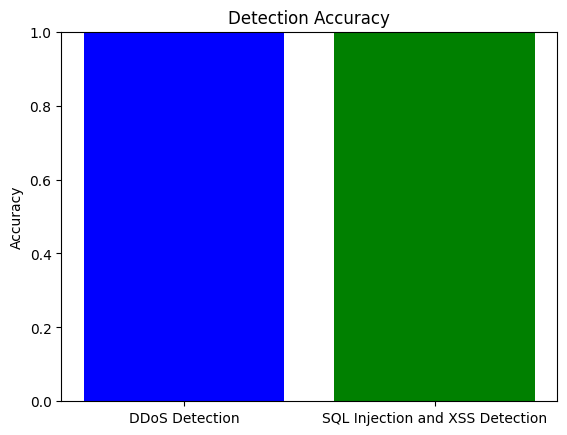

In [8]:
import joblib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

class DDoSDetection:
    def __init__(self, model, scaler):
        self.model = model
        self.scaler = scaler

    def predict(self, data):
        scaled_data = self.scaler.transform(data)
        predictions = (self.model.predict(scaled_data) > 0.5).astype("int64")
        return predictions

class SQLXSSDetection:
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer

    def predict(self, data):
        sequences = self.tokenizer.texts_to_sequences(data)
        padded_sequences = pad_sequences(sequences, maxlen=100)  # Adjust maxlen as per your model input size
        predictions = self.model.predict(padded_sequences)
        # Convert probabilities to class labels
        predicted_labels = np.argmax(predictions, axis=1)
        return predicted_labels

def main():
    # Load DDoS detection model and scaler
    ddos_detection_model = load_model('I:/WAF with mechine learning/DDos/CNN model for DDOS.h5')
    ss_ddos = joblib.load('I:/WAF with mechine learning/DDos/dods_standard_scaler.pkl')
    
    # Load SQL injection and XSS detection model and tokenizer
    sql_xss_detection_model = load_model('I:/WAF with mechine learning/SQL and XSS/CNN_GRU_model_for_XSS_and_SQL_injection.keras')
    tokenizer = joblib.load('I:/WAF with mechine learning/SQL and XSS/tokenizer.pkl')

    # Initialize DDoS detection layer
    ddos_detector = DDoSDetection(ddos_detection_model, ss_ddos)

    # Initialize SQL injection and XSS detection layer
    sql_xss_detector = SQLXSSDetection(sql_xss_detection_model, tokenizer)

    # Load your test datasets
    ddos_test_data = pd.read_csv('I:/WAF with mechine learning/Dataset/DDos 2019 cic/01-12/DrDoS_DNSdata_new_20features_X.csv').iloc[:100000, :]
    xss_sql_test_data = pd.read_csv('I:/WAF with mechine learning/Dataset/SQL and XSS/csic_databasetest.csv', index_col=0)

    # Preprocess the test dataset for DDoS detection
    ddos_test_data_std = ss_ddos.transform(ddos_test_data.iloc[:, :20])

    # Preprocess the test dataset for SQL injection and XSS detection
    xss_sql_test_data_text = xss_sql_test_data['Method'] + ' ' + xss_sql_test_data['URL'] + ' ' + xss_sql_test_data['User-Agent'] + ' ' + xss_sql_test_data['content'] + ' ' + xss_sql_test_data['content-type'] + ' ' + xss_sql_test_data['content_length'] + ' ' + xss_sql_test_data['Accept']
    xss_sql_test_data_text = xss_sql_test_data_text.astype(str)  # Ensure all data is string type

    # First Layer: DDoS Detection
    ddos_predictions = ddos_detector.predict(ddos_test_data_std)

    # Second Layer: SQL injection and XSS Detection
    xss_sql_test_data_text = xss_sql_test_data_text.iloc[:550]  # Select only the first 550 data points
    xss_sql_predictions = sql_xss_detector.predict(xss_sql_test_data_text)

    # Load test labels for DDoS and SQL Injection/XSS
    ddos_test_labels = pd.read_csv('I:/WAF with mechine learning/Dataset/DDos 2019 cic/01-12/DrDoS_DNSlabel.csv').iloc[:100000, :]
    xss_sql_test_labels = xss_sql_test_data['classification'][:550]  # Select labels for the first 550 data points

    # Extract labels if needed
    ddos_test_labels = ddos_test_labels.iloc[:, 1].values  # Assuming labels are in the second column

    # Calculate accuracies
    ddos_accuracy = np.mean(ddos_predictions == ddos_test_labels)
    xss_sql_accuracy = np.mean(xss_sql_predictions == xss_sql_test_labels.values)

    # Print accuracies
    print("DDoS Detection Accuracy:", ddos_accuracy)
    print("SQL Injection and XSS Detection Accuracy:", xss_sql_accuracy)
 # Visualize accuracies in a bar chart
    labels = ['DDoS Detection', 'SQL Injection and XSS Detection']
    accuracies = [ddos_accuracy, xss_sql_accuracy]
    
    plt.bar(labels, accuracies, color=['blue', 'green'])
    plt.ylabel('Accuracy')
    plt.title('Detection Accuracy')
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
    plt.show()
if __name__ == "__main__":
    main()
